1. Load Data
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
#from sklearn.model_selection import 
from sklearn.metrics import precision_score,average_precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import (precision_recall_curve, auc,roc_curve,precision_recall_fscore_support)
from sklearn.naive_bayes import GaussianNB


%matplotlib inline

In [2]:
bc_df = pd.read_csv('C:/Data/breast-cancer-wisconsin-data.csv')

In [3]:

print('data is a %s' % type(bc_df))
print('column names %s' % (bc_df.columns))
print('=========================================================================')
print('data has %d rows and %d columns' % bc_df.shape)
print('Basic Statistics about data%s' % ('_'*50))
print(bc_df.describe())
print('')
print('Sample of data%s' % ('_'*50))
print('data type of the data' % bc_df.dtypes)
print('=========================================================================')
print(bc_df.head().T)

data is a <class 'pandas.core.frame.DataFrame'>
column names Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
data has 569 rows and 33 columns
Basic Statistics about data__________________________________________________
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean 

In [4]:
bc_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
bc_df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Unnamed column has null values also Unnamed column has no contribution to the analysis so lets drop the column

In [6]:
bc_df.drop(['Unnamed: 32'], inplace= True, axis=1)

In [7]:
bc_df.drop(['id'], inplace= True, axis=1)

Lets check How many rows are with Diagnosis (M = malignant, B = benign)

In [8]:
bc_df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

visulaization of class distribution
visulization of cancerous V non cancerous data

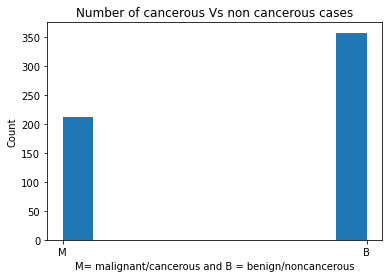

In [9]:
plt.hist(bc_df.diagnosis)
plt.title('Number of cancerous Vs non cancerous cases')
plt.xlabel('M= malignant/cancerous and B = benign/noncancerous')
plt.ylabel('Count')
plt.show()

Text(0.5, 0, 'M= malignant/cancerous and B = benign/noncancerous')

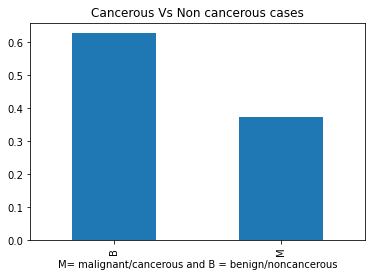

In [12]:
bc_df['diagnosis'].value_counts(normalize=True).plot(kind='bar');
plt.title('Cancerous Vs Non cancerous cases')
plt.xlabel('M= malignant/cancerous and B = benign/noncancerous')

In [11]:
# Pair Plot
sns.pairplot(bc_df)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000198A18A0F70> (for post_execute):


KeyboardInterrupt: 

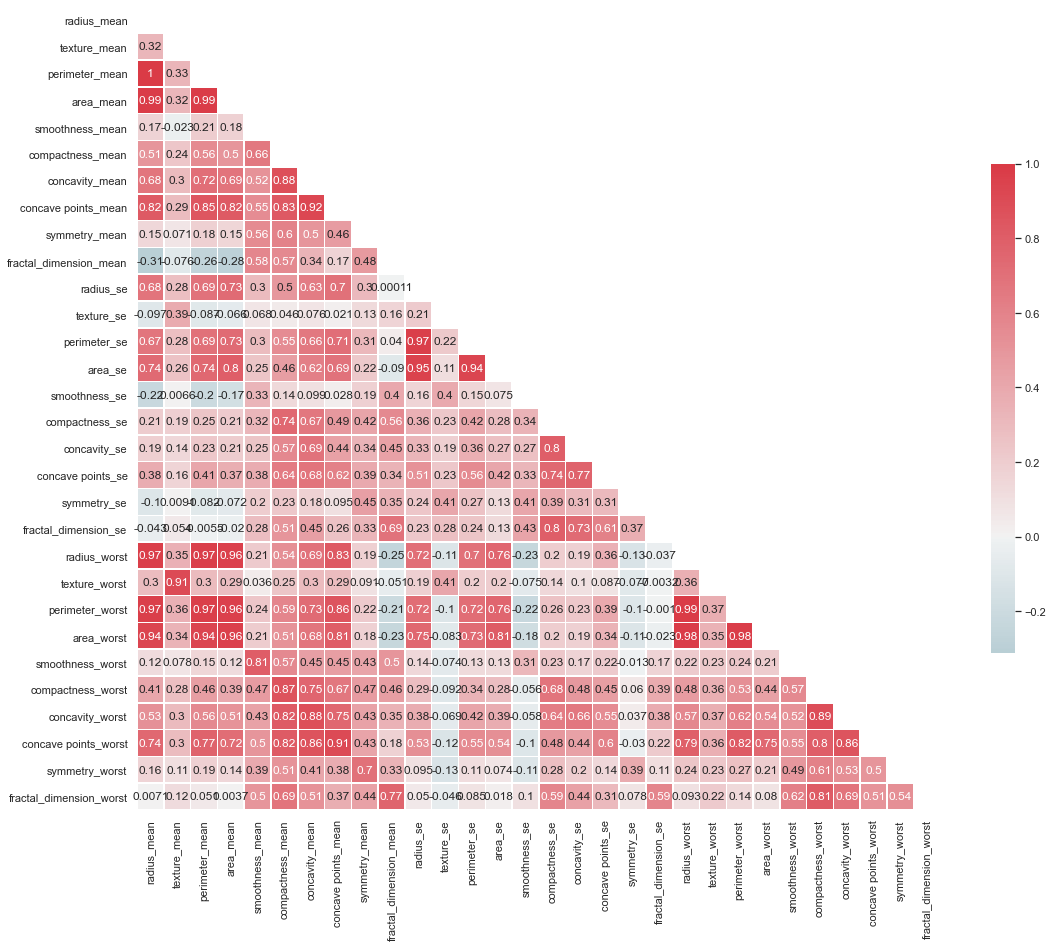

In [13]:
#lets look at the correlation
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(bc_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(bc_df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();



It seems that:

There are strong correlations between many variables. Next, a heatmap will be used to present the numerical correlations.

The univariate distributions on the diagonal show a separation of malignant and benign cells for several mean features. Malignant cells tend to have larger mean values of:

radius
perimeter
area
compactness
concavity
concave points

As it was expected there are very strong correlations between radius, perimeter and area.

Compactness, concavity and and concave points are also highly correlated.

These highly correlated features result in redundant information. It is suggested to remove highly correlated features to avoid a predictive bias for the information contained in these features.

What is the baseline accuracy?

In [14]:
bc_df.diagnosis.value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [15]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'red',lw = 3, alpha = 0.9, where = 'post')
    #ax[1].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    print(classification_report(actual, prediction))
    return (accuracy_, precision_, recall_, roc_auc_)

In [16]:
bm_map = {
    'B': 0,
    'M': 1
}

bc_df['diagnosis'] =  bc_df['diagnosis'].map(bm_map)

#### Select Features

In [17]:
tar_col='diagnosis'
features_col= [c for c in bc_df.columns if c!= tar_col]
X= bc_df[features_col]
y= bc_df[tar_col]


3. Logistic Regression Model

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model. 

Let us check the accuracy without any preprocessing of the data or scaling the features

Accuracy is:  0.951048951048951
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        88
           1       0.96      0.91      0.93        55

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



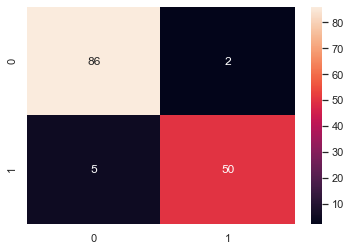

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lin_model = LogisticRegression(solver='liblinear')
lin_model.fit(X_train, y_train)
lin_model.score(X_test, y_test)

y_pred = lin_model.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

### Data Preprocessing 

#### Scale Features
Create comparable features in terms of units, e.g. if there are values in different units, then, the scaled data will be the same.

Create comparable features in terms of size, e.g. if two variables have vastly different ranges, the one with the larger range may dominate the predictive model, even though it may be less important to the target variable than the variable with the smaller range.

In [19]:
# Use StandardScaler to fit and transform X to be standardised 
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

There are mainly two approaches to perform dimensionality reduction: Feature Selection and Feature Transformation.

Feature Selection approach tries to subset important features and remove collinear or not-so-important features. One can read more about it, here.
Feature Transformation also is known as Feature Extraction tries to project the high-dimensional data into lower dimensions. Some Feature Transformation techniques are PCA, Matrix-Factorisation, Autoencoders, t-Sne etc.

Principal Component Analysis (PCA)

PCA is a preprocessing step, which decomposes a multivariate dataset. It is used when we need to tackle datasets with a large number of features with different scales, some of which might be correlated. These correlations and the high dimension of the dataset bring a redudancy in the information. Applying PCA, the original features are transformed to linear combinations of new independent variables, which reduce the complexity of the dataset and thus, the computational cost.

Summarizing, the main purpose of principal component analysis is to:

identify hidden pattern in a data set,

reduce the dimensionnality of the data by removing the noise and redundancy in the data,

identify correlated variables

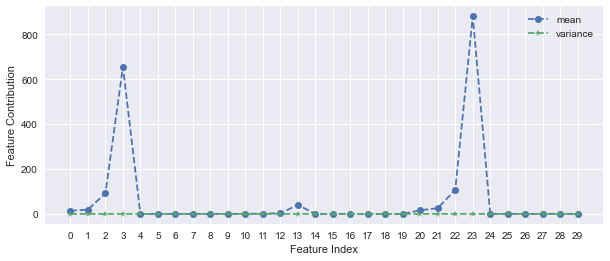

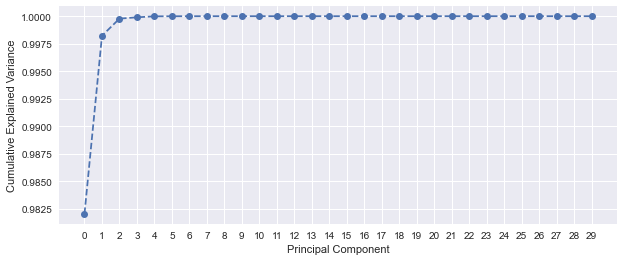

In [20]:
#PCA using X which is not scaled features
pca = PCA(30)
projected = pca.fit_transform(X)
pca_inversed_data = pca.inverse_transform(np.eye(30))

plt.style.use('seaborn')

def plot_pca():
    plt.figure(figsize=(10, 4))
    plt.plot(pca_inversed_data.mean(axis=0), '--o', label = 'mean')
    plt.plot(np.square(pca_inversed_data.std(axis=0)), '--*', label = 'variance')
    plt.ylabel('Feature Contribution')
    plt.xlabel('Feature Index')
    plt.legend(loc='best')
    plt.xticks(np.arange(0, 30, 1.0))
    plt.show()

    plt.figure(figsize = (10, 4))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), '--o')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Explained Variance')
    plt.xticks(np.arange(0, 30, 1.0))
    plt.show()

plot_pca()

The above plot shows the PCA before scaling the data set. From the feature contribution plot we can clearly see that feature index 3 and 23 dominating the PCA
This is explained by the large variance of area_mean(feature index 3) and area_worst(feature index 23) Thus feature scaling prior to PCA is needed.

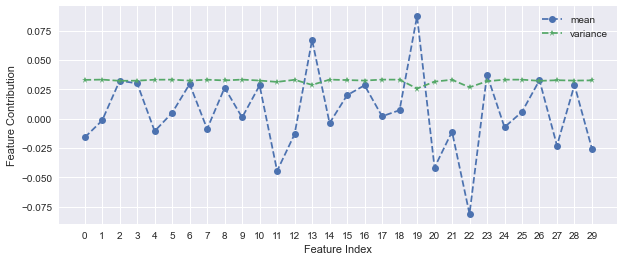

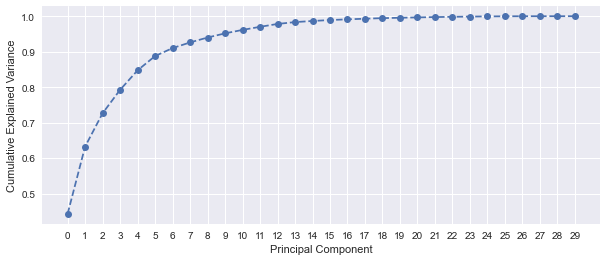

In [21]:
#PCA using Xs which is scaled features
projected_scaled = pca.fit_transform(Xs)
pca_inversed_data = pca.inverse_transform(np.eye(30))

plot_pca()

min 16 components are required to explain the 100% variance

In [22]:
# Transform standardised data with PCA 16 components
bc_pca = PCA(n_components=16)

# Fit PCA with standardised features
bc_pca.fit(Xs)
X_pca = bc_pca.transform(Xs)

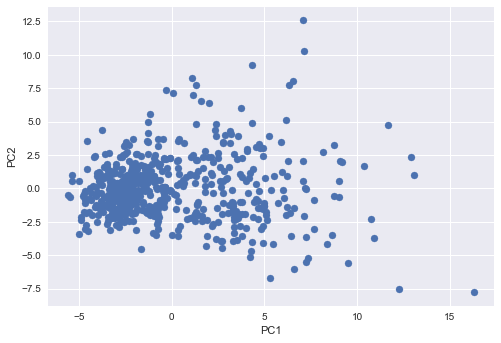

In [23]:
# Plot PC1 vs PC2
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [24]:
# Split PCA data 
Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


#### Logistic regression with 16 componenets

Accuracy : 0.9912 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9767 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9884                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


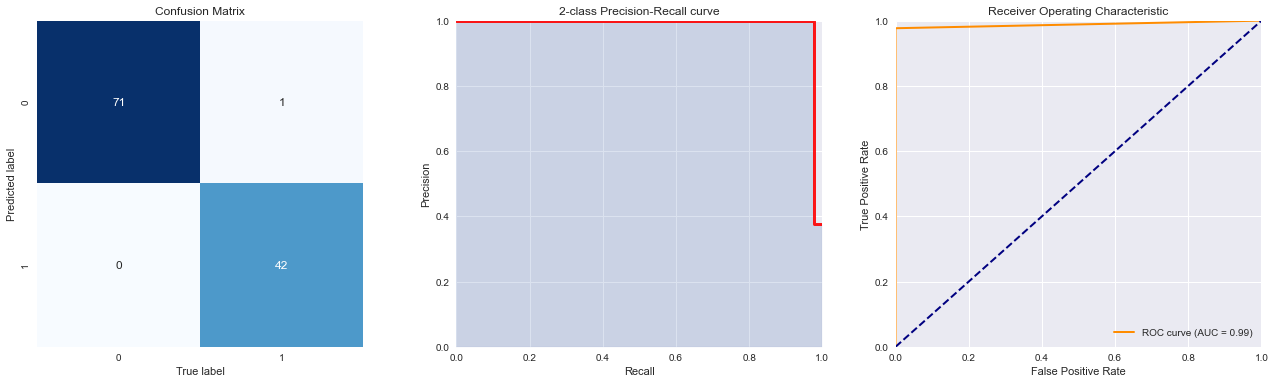

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



(0.9912280701754386, 1.0, 0.9767441860465116, 0.9883720930232558)

In [25]:
lin_model_p = LogisticRegression(solver='liblinear')
lin_model_p.fit(Xp_train, yp_train)
lin_model_p.score(Xp_test, yp_test)

y_lin_pred = lin_model_p.predict(Xp_test)
show_summary_report(yp_test,y_lin_pred)

#### Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [26]:
# Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.
knn5 = KNeighborsClassifier(n_neighbors=5)

# CV accuracy of KNN using PCA-transformed data
pca_scores = cross_val_score(knn5, Xp_train, yp_train, cv=5)
print("Number of features in PCA-transformed data:    ", X_pca.shape[1])
print("5-fold CV accuracy using PCA-transformed data: ", pca_scores.mean())

Number of features in PCA-transformed data:     16
5-fold CV accuracy using PCA-transformed data:  0.9604395604395606


#### Support Vector Machine


Accuracy : 0.9825 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9767 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9767 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9813                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


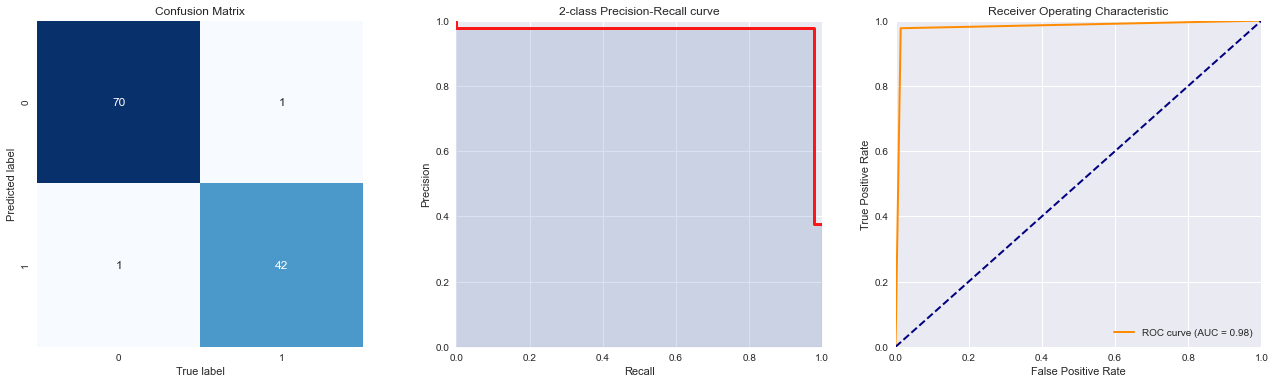

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



(0.9824561403508771, 0.9767441860465116, 0.9767441860465116, 0.981329839502129)

In [27]:
svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(Xp_train, yp_train)
svc_model.score(Xp_test, yp_test)

y_svc_pred = svc_model.predict(Xp_test)
show_summary_report(yp_test,y_svc_pred)

#### Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

Accuracy : 0.9211 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9250 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8605 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9091                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


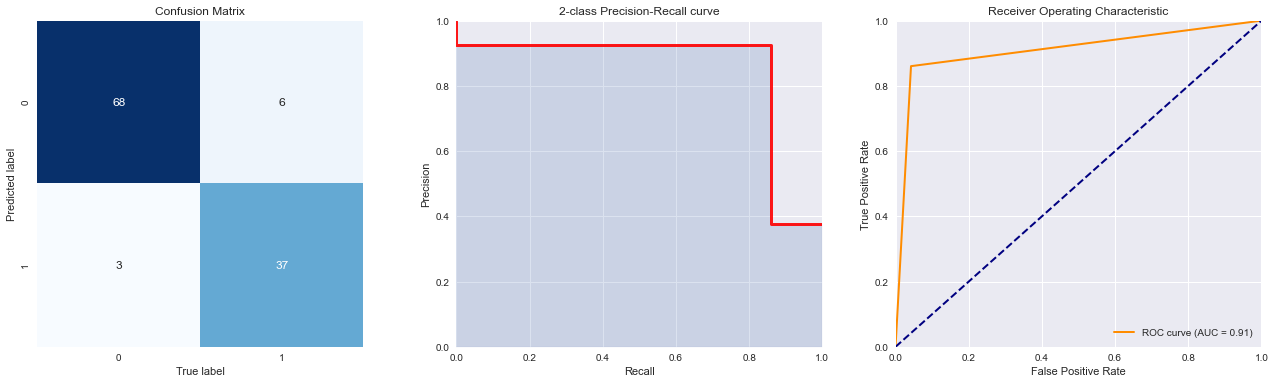

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        71
           1       0.93      0.86      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



(0.9210526315789473, 0.925, 0.8604651162790697, 0.9091057975761546)

In [28]:
#Create a Gaussian Classifier
nb_model = GaussianNB()

 
# Train the model using the training sets
nb_model.fit(Xp_train, yp_train)
nb_model.score(Xp_test, yp_test)

y_nb_pred = nb_model.predict(Xp_test)
show_summary_report(yp_test,y_nb_pred)

##### Random Forest

Accuracy : 0.9561 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9524 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9302 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9510                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


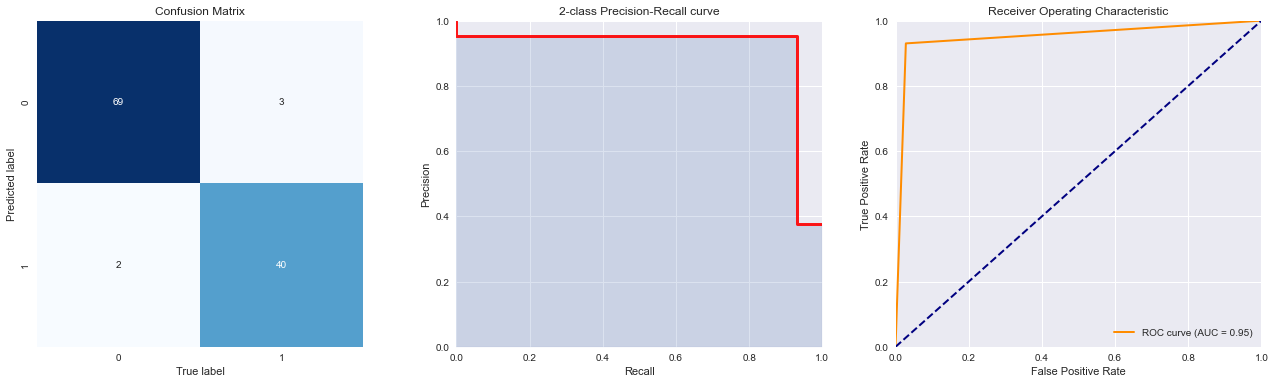

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Wall time: 2.01 s


(0.956140350877193, 0.9523809523809523, 0.9302325581395349, 0.9510317720275139)

In [43]:
%%time
#Random forest Base
rfc = RandomForestClassifier(n_estimators = 100)

rfc.fit(Xp_train, yp_train)
rfc.score(Xp_test, yp_test)
y_rfc_pred= rfc.predict(Xp_test)


show_summary_report(yp_test,y_rfc_pred)

#### GridSearch CV

6 Gridsearch optimal parameters for all three models.

Is there any difference between accuracy score of Logistic Regression and SVM? 

Use grid serach to find optimal parameter for both these models.



In [32]:
%%time
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)
lr_gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\sthut\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sthut\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sthut\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sthut\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sthut\anaconda3\envs\tf\lib\

C:\Users\sthut\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sthut\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

C:\Users\sthut\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sthut\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Wall time: 1.64 s


C:\Users\sthut\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']},
             verbose=1)

In [33]:
best_svc = lr_gs.best_estimator_
print(lr_gs.best_params_)
print(lr_gs.best_score_)

{'C': 1, 'penalty': 'l2'}
0.9490451793199813


In [34]:
%%time
# gridsearch SVM
#from sklearn.grid_search import GridSearchCV

svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

svc_gs = GridSearchCV(SVC(probability=True), svc_params, cv=5, verbose=1)
svc_gs.fit(X_pca, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wall time: 5.84 s


GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=1)

In [35]:
best_svc = svc_gs.best_estimator_
print(svc_gs.best_params_)
print(svc_gs.best_score_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.9754075454122031


An exhaustive grid search takes in as many hyperparameters as you would like, and tries every single possible combination of the hyperparameters as well as as many cross-validations as you would like it to perform. An exhaustive grid search is a good way to determine the best hyperparameter values to use, but it can quickly become time consuming with every additional parameter value and cross-validation that you add.

In [47]:
%%time
rfc1 = RandomForestClassifier()
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

rfc_hypparams = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
           min_samples_leaf = min_samples_leaf)

# rfc_hypparams = {
#     n_estimators = n_estimators, max_depth = max_depth,  
#               min_samples_split = min_samples_split, 
#              min_samples_leaf = min_samples_leaf
# }


rfc_gs = GridSearchCV(rfc1,rfc_hypparams, cv = 3, verbose = 1, 
                      n_jobs = -1)
rfc_gs.fit(X_pca, y)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Wall time: 10min 49s


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 15, 25, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [100, 300, 500, 800, 1200]},
             verbose=1)

In [48]:
print(rfc_gs.best_params_)

{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}


Accuracy : 0.9561 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9318 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9535 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9556                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


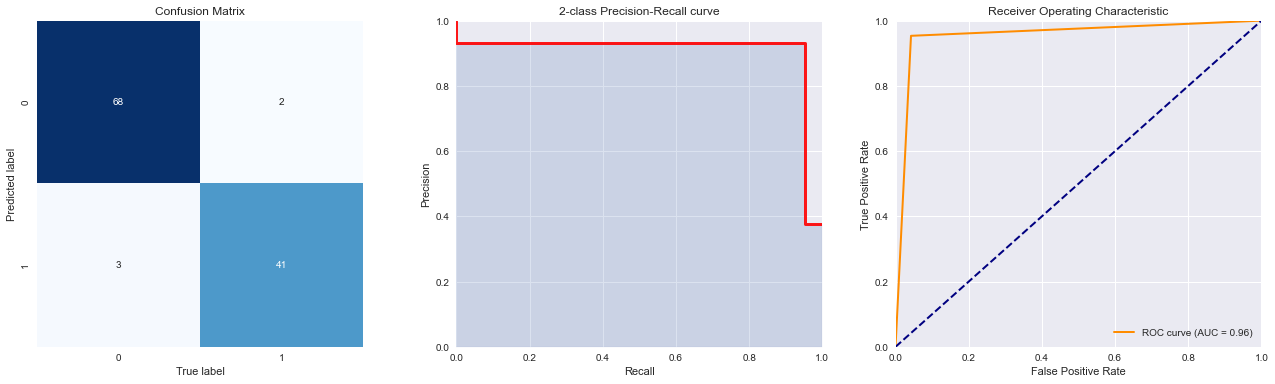

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Wall time: 5.94 s


(0.956140350877193, 0.9318181818181818, 0.9534883720930233, 0.9556174254831313)

In [53]:
%%time
# RF with the above best parameters
rfc_bestp = RandomForestClassifier(n_estimators=800,
                                 max_depth = 25, 
                                 min_samples_leaf = 1, 
                                 min_samples_split = 2, 
                                 n_jobs = -1,
                                )

rfc_bestp.fit(Xp_train, yp_train)
rfc_bestp.score(Xp_test, yp_test)
y_rfc_bestp_pred= rfc_bestp.predict(Xp_test)


show_summary_report(yp_test,y_rfc_bestp_pred)

Accuracy : 0.9825 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9767 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9767 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9813                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


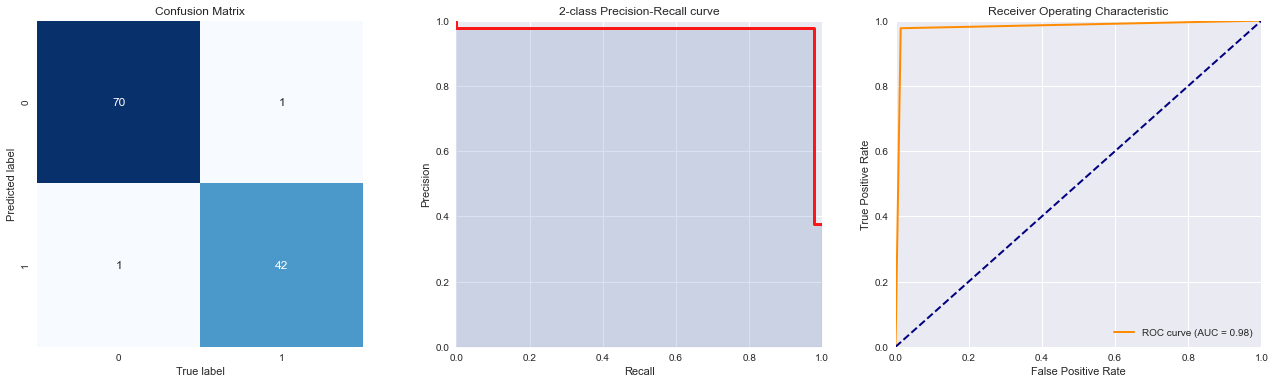

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



(0.9824561403508771, 0.9767441860465116, 0.9767441860465116, 0.981329839502129)

In [36]:
svc_model1 = SVC(C=100, kernel='rbf',gamma=0.0001,probability=True)
svc_model1.fit(Xp_train, yp_train)
svc_model1.score(Xp_test, yp_test)

y_svc_pred1 = svc_model.predict(Xp_test)
show_summary_report(yp_test,y_svc_pred1)

#### Plotting Learning Curves

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. Below the learning curves of a Logistic regressor, naive bayes and an SVM.

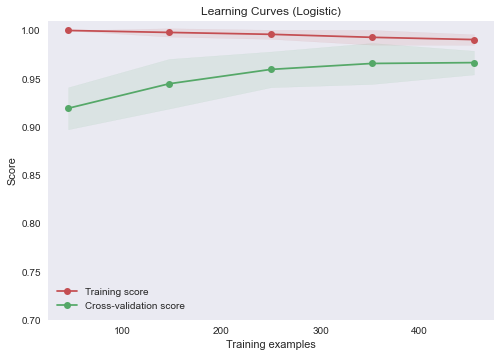

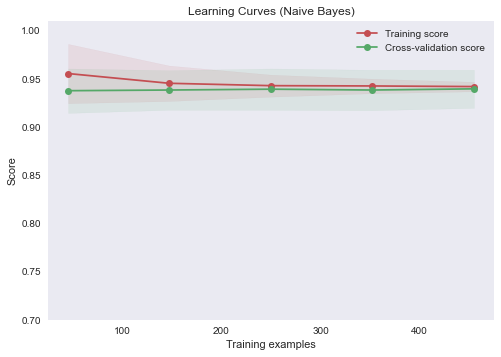

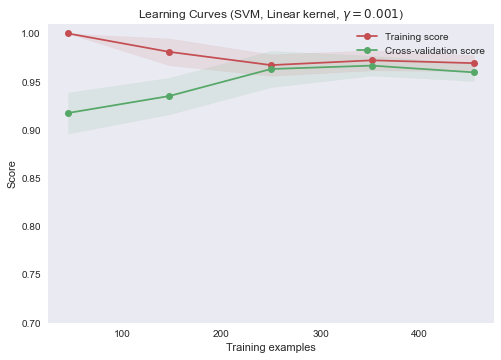

In [39]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


target_col = 'diagnosis'
feature_cols = [c for c in bc_df.columns if c != target_col]

X =  bc_df[feature_cols]
y = bc_df[target_col]

title = "Learning Curves (Logistic)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)

estimator = LogisticRegression(C = 70.17038286703837, penalty = 'l1', solver = 'liblinear')
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01),cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, Linear kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

estimator = SVC(C=27.825594022071257, gamma=1e-05, kernel = 'linear')
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show();
